# Comments' length

Author:
- Reinaldo Augusto

Status:
- DONE

Goal:
- Analyse the correlation between the comment's length and the resolution to the problem.

## Importing the ReclameAqui dataset

In [2]:
from util import agg_jsonls  # helper function
from pprint import pprint

# Unique reviews
unique_ids = set()
reviewsRA = []
for complaint in agg_jsonls("final_dataset_RA"):
    if "review_ID" in complaint and complaint["review_ID"] not in unique_ids:
        unique_ids.add(complaint["review_ID"])
        reviewsRA.append(complaint)

print(f"We have a total of {len(reviewsRA)} reviews!")

We have a total of 51655 reviews!


In [3]:
from datetime import datetime
import numpy as np
import pandas as pd


def extract_days_to_resolution(review):
    if "datetime" in review and "reply" in review["responses"]["final"]:
        init_dt = datetime.strptime(review["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        final_ans_dt = datetime.strptime(review["responses"]["final"]["reply"][0]["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        days_diff = (final_ans_dt - init_dt).days
        if days_diff < 0:
            return 0
        return days_diff
    return np.nan


def extract_days_to_first_contact(review):
    if "datetime" in review and "business" in review["responses"] and len(review["responses"]["business"]) > 0:
        init_dt = datetime.strptime(review["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        final_ans_dt = datetime.strptime(review["responses"]["business"][0]["datetime"], '%Y-%m-%dT%H:%M:%SZ')
        days_diff = (final_ans_dt - init_dt).days
        if days_diff < 0:
            return 0
        return days_diff
    return np.nan


def format_RA_to_df(review):
    cols_for_df = ['title', 'description', 'business_name', 'uf', 'city', 'review_ID', 'datetime', 'timeCaptured']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp["days_to_resolution"] = extract_days_to_resolution(review)
    r_cp["days_to_first_contact"] = extract_days_to_first_contact(review)
    r_cp["resolution_outcome"] = review["responses"]["final"]["result"] if "responses" in review and "final" in review["responses"] and "result" in review["responses"]["final"] else np.nan
    return r_cp
    

dff = pd.DataFrame([format_RA_to_df(row) for row in reviewsRA])
dff.head()


,business_name,city,datetime,days_to_first_contact,days_to_resolution,description,resolution_outcome,review_ID,timeCaptured,title,uf
0,Tok&Stok - Loja Online,Embu das Artes,2020-03-26T12:48:00Z,NaN,NaN,Realizei uma compra de produtos Natalinos pelo...,NaN,102002173,2020-03-27T12:08:11Z,Paguei e nao recebi,SP
1,Tok&Stok - Loja Online,Cuiabá,2020-03-26T22:09:00Z,NaN,NaN,"Olá, adquiri uma cama queen on-line n dia 12/0...",NaN,102028063,2020-03-27T12:08:11Z,Não entregaram o móvel,MT
2,Tok&Stok - Loja Online,Rio de Janeiro,2020-03-25T16:50:00Z,NaN,NaN,Realizei a compra de 2 itens pelo site da Tok ...,NaN,101970443,2020-03-27T12:08:14Z,Não recebi um dos itens do meu pedido e fui co...,RJ
3,Tok&Stok - Loja Online,Acopiara,2020-03-25T16:52:00Z,NaN,NaN,"Fiz um pedido em dois de fevereiro, com vários...",NaN,101970555,2020-03-27T12:08:14Z,Produto não foi entregue e não resolvem,CE
4,Tok&Stok - Loja Online,Vila Velha,2020-03-25T20:20:00Z,NaN,NaN,Fiz o pedido no site no dia 18/02/20. Quando p...,NaN,101979855,2020-03-27T12:08:14Z,Não entregaram e produto e não devolvem o valo...,ES


### Extract first response

In [4]:
def extract_first_response(review):
    if "business" in review["responses"] and len(review["responses"]["business"]) > 0:
        len_comment = len(review['responses']['business'][0]['content'])
        return len_comment
    return np.nan

def format_RA_to_df_responses(review):
    cols_for_df = ['title', 'description', 'business_name', 'uf', 'city', 'review_ID', 'datetime', 'timeCaptured']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp["days_to_resolution"] = extract_days_to_resolution(review)
    r_cp["days_to_first_contact"] = extract_days_to_first_contact(review)
    r_cp["len_comment"] = len(review['description'])
    r_cp["number_of_replies"] = len(review['responses']['business'])
    r_cp["len_business_response"] = extract_first_response(review)
    r_cp["resolution_outcome"] = review["responses"]["final"]["result"] if "responses" in review and "final" in review["responses"] and "result" in review["responses"]["final"] else np.nan
    return r_cp

In [5]:
dff_responses = pd.DataFrame([format_RA_to_df_responses(row) for row in reviewsRA])
dff_responses.head()

,business_name,city,datetime,days_to_first_contact,days_to_resolution,description,len_business_response,len_comment,number_of_replies,resolution_outcome,review_ID,timeCaptured,title,uf
0,Tok&Stok - Loja Online,Embu das Artes,2020-03-26T12:48:00Z,NaN,NaN,Realizei uma compra de produtos Natalinos pelo...,NaN,436,0,NaN,102002173,2020-03-27T12:08:11Z,Paguei e nao recebi,SP
1,Tok&Stok - Loja Online,Cuiabá,2020-03-26T22:09:00Z,NaN,NaN,"Olá, adquiri uma cama queen on-line n dia 12/0...",NaN,342,0,NaN,102028063,2020-03-27T12:08:11Z,Não entregaram o móvel,MT
2,Tok&Stok - Loja Online,Rio de Janeiro,2020-03-25T16:50:00Z,NaN,NaN,Realizei a compra de 2 itens pelo site da Tok ...,NaN,986,0,NaN,101970443,2020-03-27T12:08:14Z,Não recebi um dos itens do meu pedido e fui co...,RJ
3,Tok&Stok - Loja Online,Acopiara,2020-03-25T16:52:00Z,NaN,NaN,"Fiz um pedido em dois de fevereiro, com vários...",NaN,941,0,NaN,101970555,2020-03-27T12:08:14Z,Produto não foi entregue e não resolvem,CE
4,Tok&Stok - Loja Online,Vila Velha,2020-03-25T20:20:00Z,NaN,NaN,Fiz o pedido no site no dia 18/02/20. Quando p...,NaN,738,0,NaN,101979855,2020-03-27T12:08:14Z,Não entregaram e produto e não devolvem o valo...,ES


### Analysing the distribution of the length of the first responses

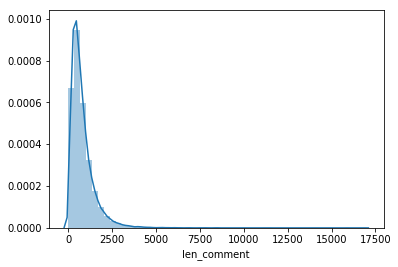

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(dff_responses['len_comment']);

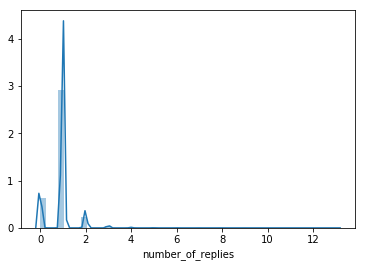

In [9]:
sns.distplot(dff_responses['number_of_replies']);

In [10]:
dff_responses['number_of_replies'].describe()

count    51655.000000
mean         0.926938
std          0.550192
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: number_of_replies, dtype: float64

In [11]:
dff_responses['len_business_response'].describe()

count    43129.000000
mean       497.670662
std        236.630906
min          0.000000
25%        344.000000
50%        472.000000
75%        633.000000
max       3630.000000
Name: len_business_response, dtype: float64

In [12]:
dff_responses['number_of_replies'].value_counts()

1     39257
0      8526
2      3235
3       488
4       100
5        28
6        11
8         4
7         3
9         2
13        1
Name: number_of_replies, dtype: int64

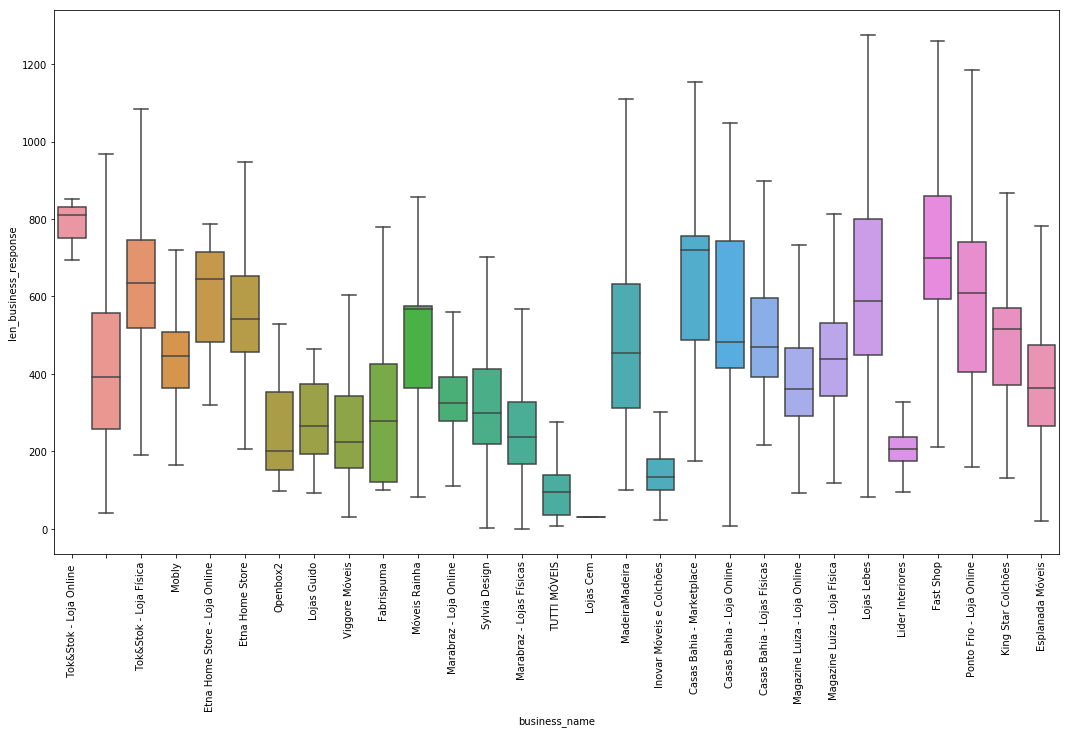

In [14]:
ax, fig = plt.subplots(figsize=(18,10))
sns.boxplot(y='len_business_response',x='business_name',data=dff_responses, showfliers=False)
plt.xticks(rotation=90);

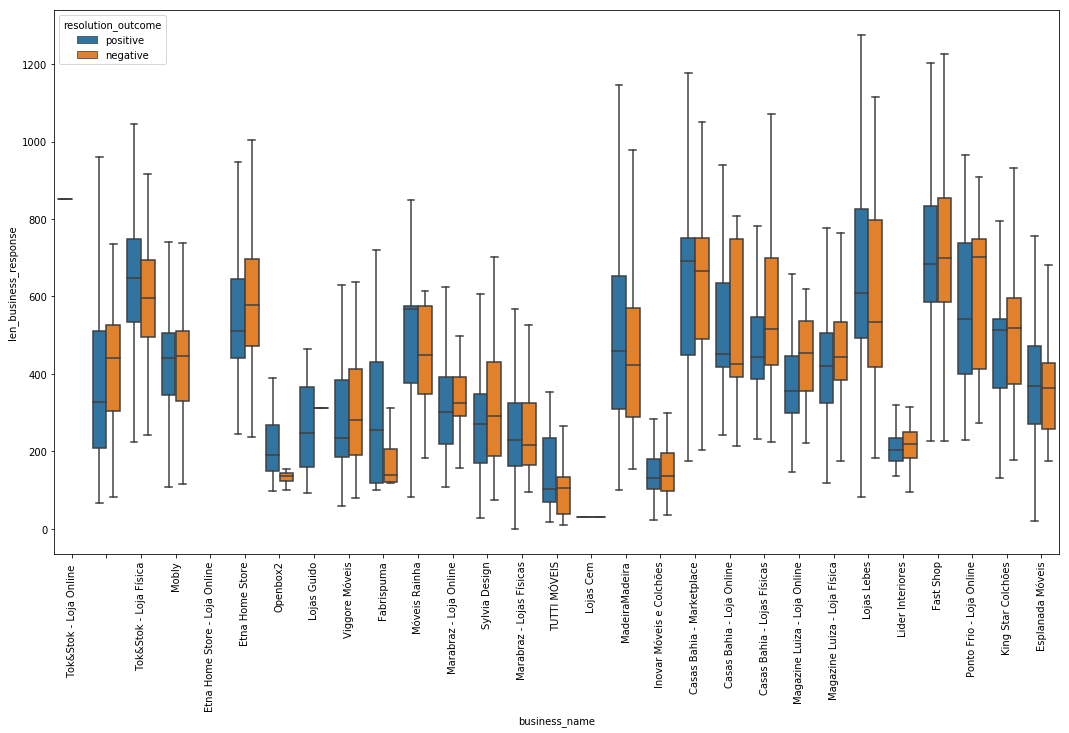

In [15]:
ax, fig = plt.subplots(figsize=(18,10))
sns.boxplot(y='len_business_response',x='business_name', hue='resolution_outcome',data=dff_responses, showfliers=False)
plt.xticks(rotation=90);

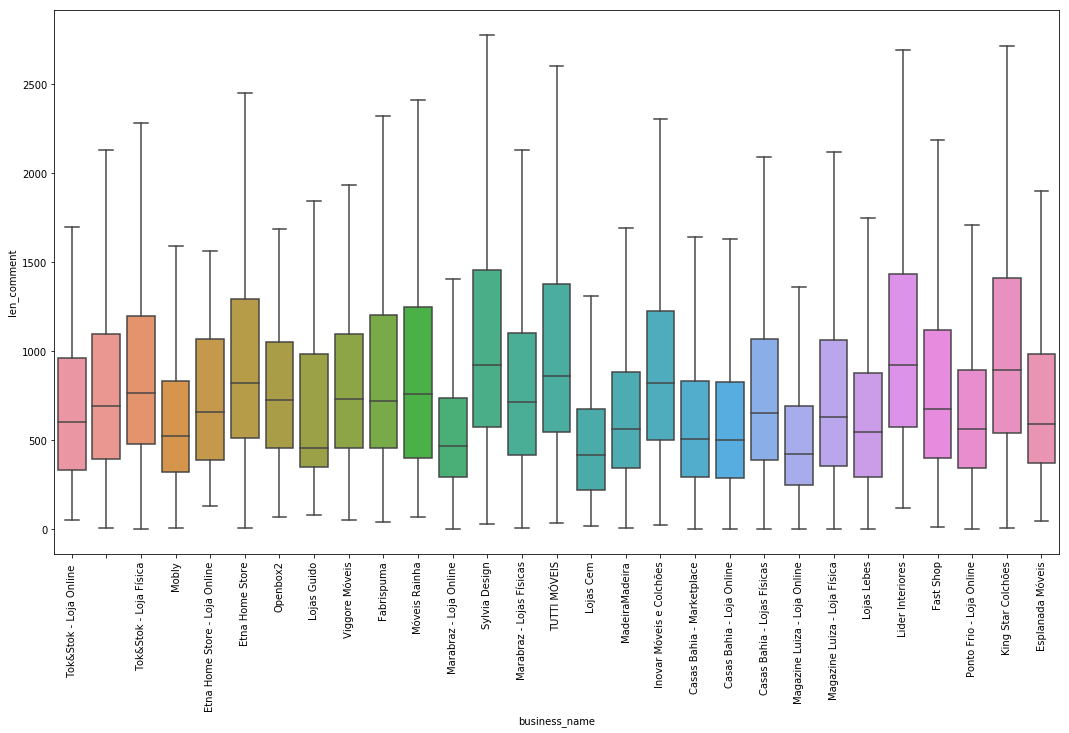

In [16]:
ax, fig = plt.subplots(figsize=(18,10))
sns.boxplot(y='len_comment',x='business_name',data=dff_responses, showfliers=False)
plt.xticks(rotation=90);

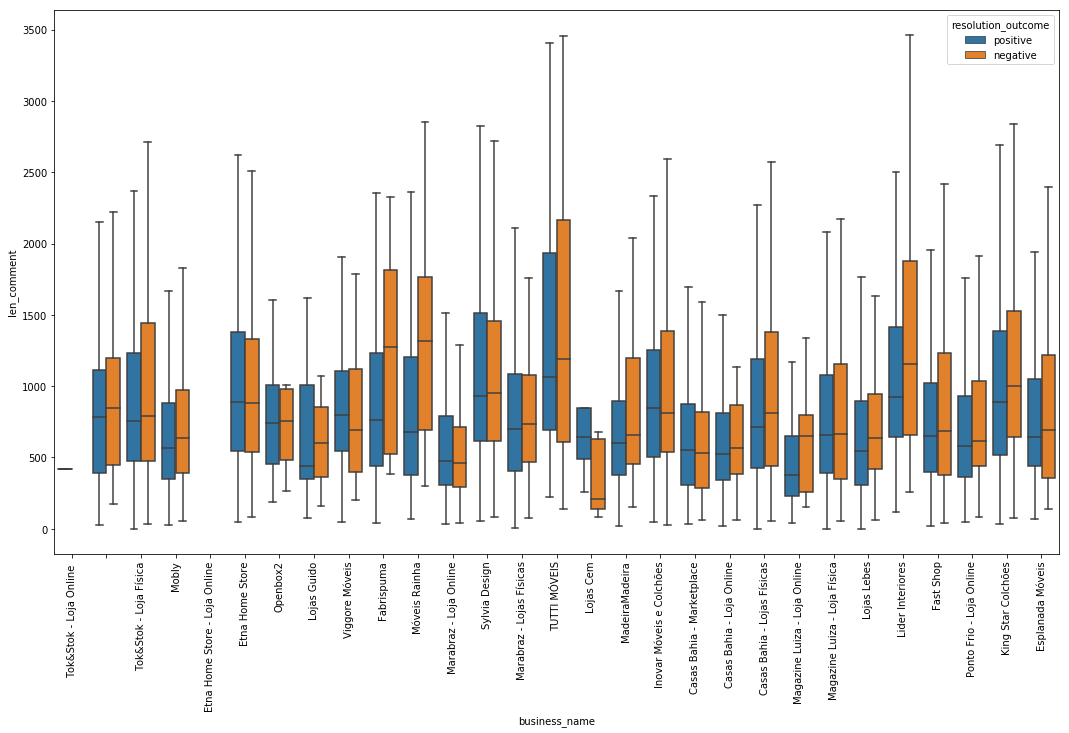

In [18]:
ax, fig = plt.subplots(figsize=(18,10))
sns.boxplot(y='len_comment',x='business_name', hue='resolution_outcome',data=dff_responses, showfliers=False)
plt.xticks(rotation=90);

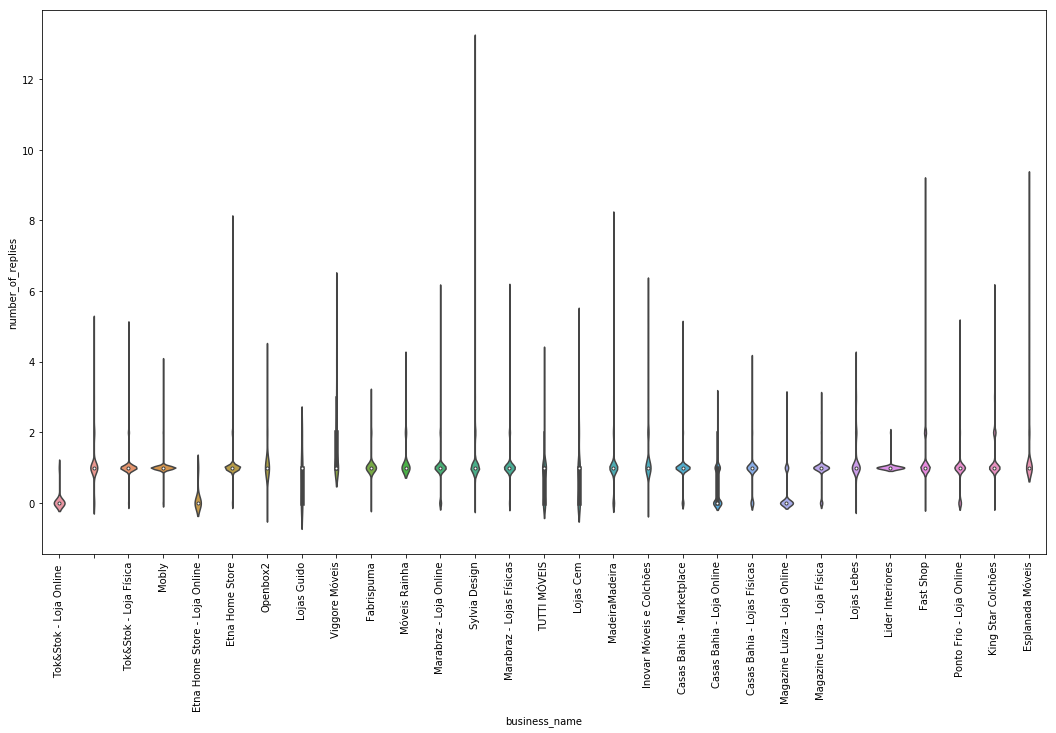

In [159]:
ax, fig = plt.subplots(figsize=(18,10))
sns.violinplot(y='number_of_replies',x='business_name',data=dff_responses)
plt.xticks(rotation=90);

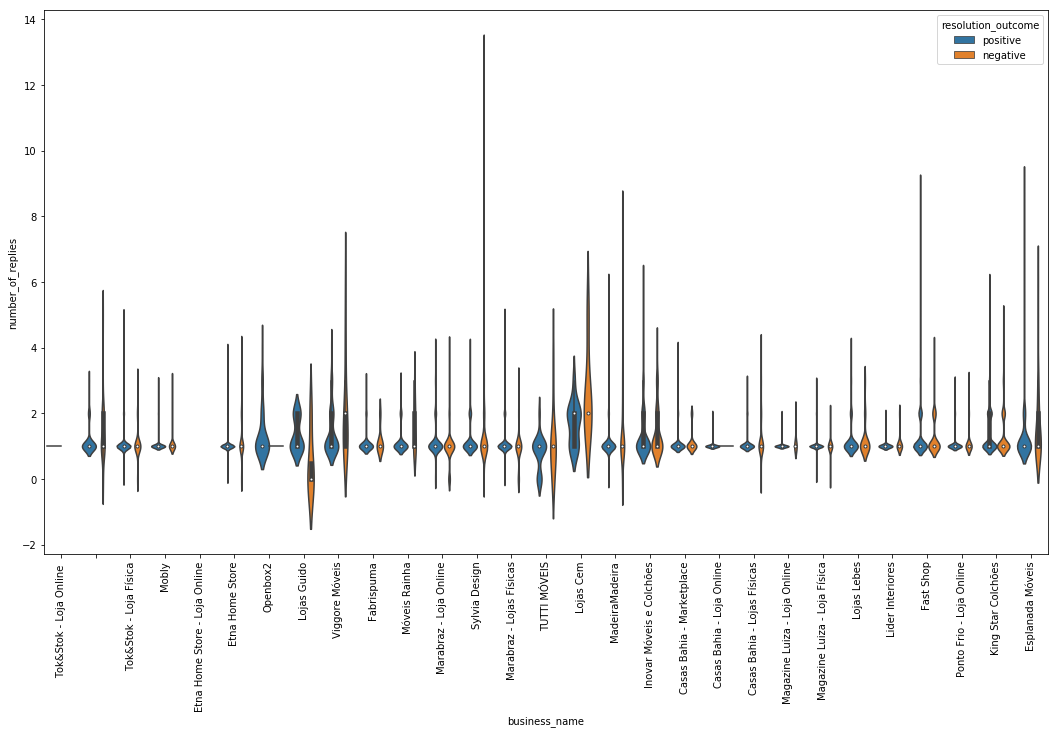

In [160]:
ax, fig = plt.subplots(figsize=(18,10))
sns.violinplot(y='number_of_replies',x='business_name',hue='resolution_outcome',data=dff_responses)
plt.xticks(rotation=90);

In [19]:
dff_responses[['len_comment','len_business_response','days_to_first_contact', 'days_to_resolution','number_of_replies']].corr()

,len_comment,len_business_response,days_to_first_contact,days_to_resolution,number_of_replies
len_comment,1.000000,0.019949,0.058312,0.073782,0.087402
len_business_response,0.019949,1.000000,-0.078576,-0.023872,-0.038864
days_to_first_contact,0.058312,-0.078576,1.000000,0.095451,-0.045712
days_to_resolution,0.073782,-0.023872,0.095451,1.000000,0.095624
number_of_replies,0.087402,-0.038864,-0.045712,0.095624,1.000000


In [20]:
df = dff_responses[~dff_responses['len_business_response'].isna()].copy()
df.shape

(43129, 14)

In [21]:
import seaborn as sns
import matplotlib.pyplot  as plt

%matplotlib inline

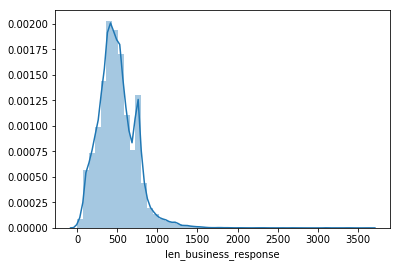

In [22]:
sns.distplot(df['len_business_response']);

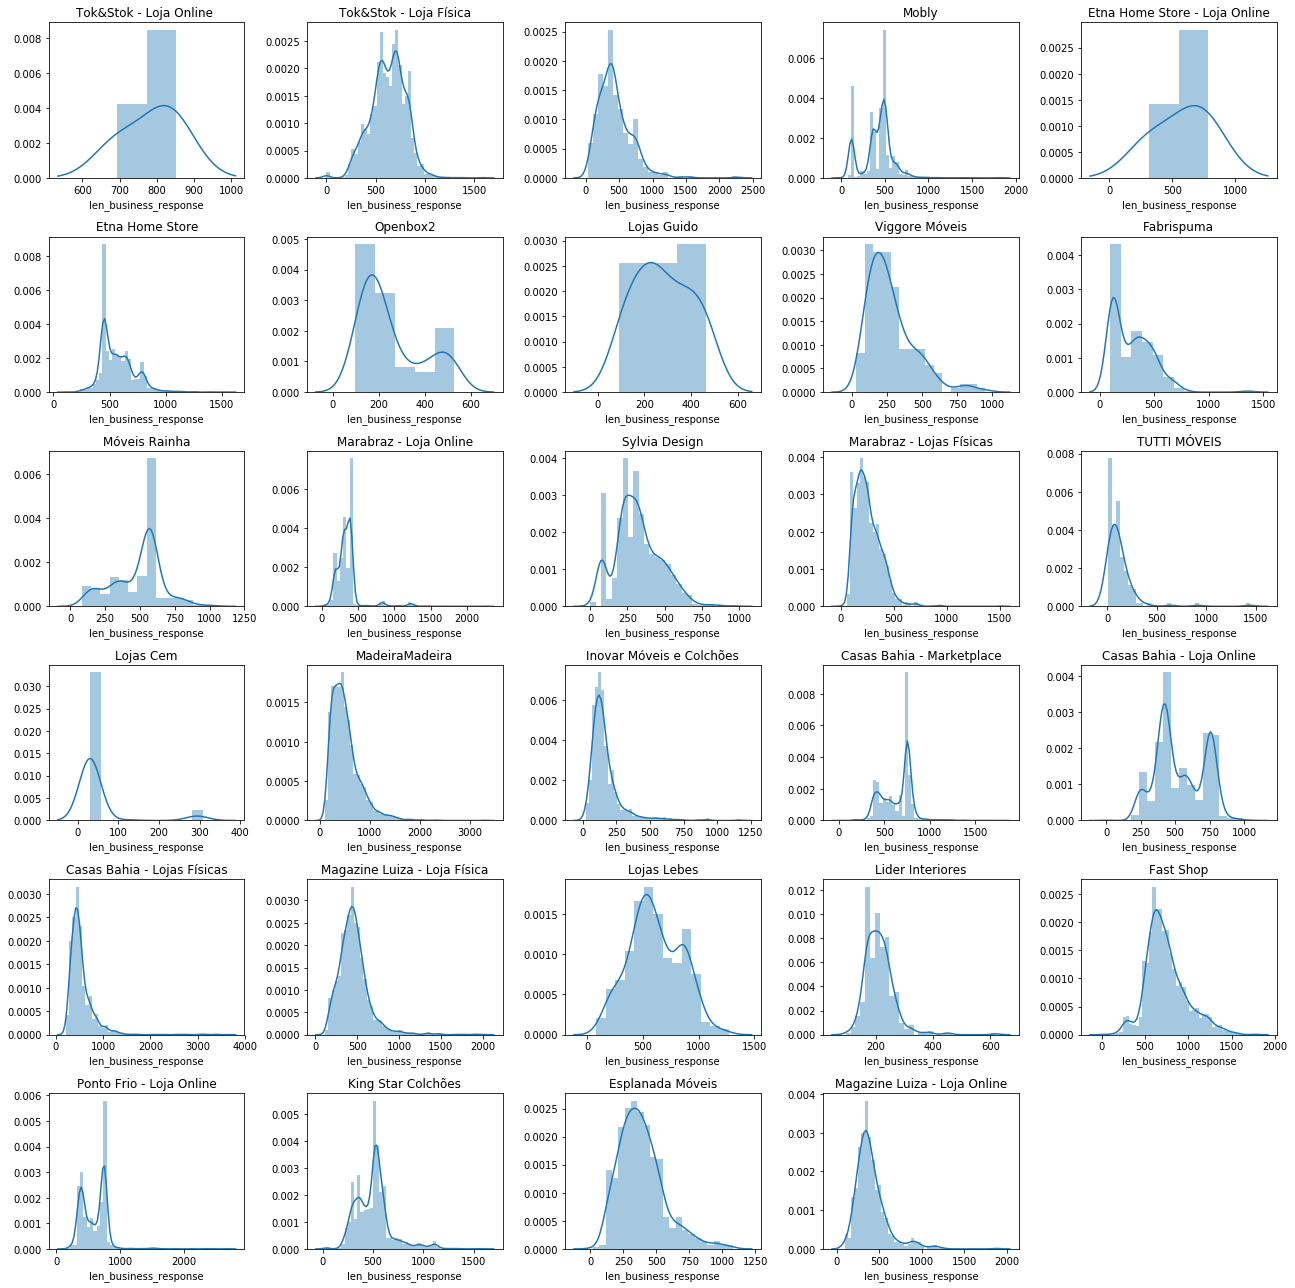

In [23]:
fig = plt.figure(figsize=(18,18))
i = 1
for j in df['business_name'].unique():
    plt.subplot(6,5,i)
    sns.distplot(df[df['business_name']==j]['len_business_response'])
    plt.title(j);    
    i=i+1
plt.tight_layout()

In [25]:
boxplot_df = df.copy()
boxplot_df.loc[boxplot_df['resolution_outcome'].isna(), 'resolution_outcome'] = 'Without resolution'

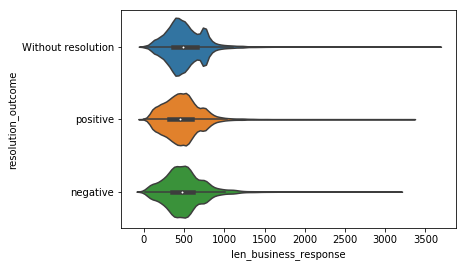

In [28]:
sns.violinplot(y='resolution_outcome',x='len_business_response', data=boxplot_df);

In [27]:
pd.crosstab(dff_responses['business_name'],dff_responses['resolution_outcome'])

resolution_outcome,negative,positive
business_name,,
,44,158
Casas Bahia - Loja Online,37,174
Casas Bahia - Lojas Físicas,125,408
Casas Bahia - Marketplace,142,454
Esplanada Móveis,29,321
Etna Home Store,269,1081
Fabrispuma,13,129
Fast Shop,208,1219
Inovar Móveis e Colchões,72,331


## Conclusions

As we have seen, we don't have a clear relationship between length of the company responses or of the description of the complaints and any other variable. 